In [4]:
from PartialDerivatives import *
%matplotlib notebook
from sympy import *

Введите названия переменных: x y
Функция в аналитическом виде :  y*(x**2) + x*(y**3) - x*y
Есть ли ограничения, 1 - да; 0 нет : 1
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1
В точке {x: 0, y: -1} нет экстремума - седловая точка
В точке {x: 0, y: 0} нет экстремума - седловая точка
В точке {x: 0, y: 1} нет экстремума - седловая точка
В точке {x: 2/5, y: -sqrt(5)/5} нет экстремума - седловая точка
В точке {x: 2/5, y: sqrt(5)/5} нет экстремума - седловая точка
В точке {x: 1, y: 0} нет экстремума - седловая точка


<IPython.core.display.Javascript object>


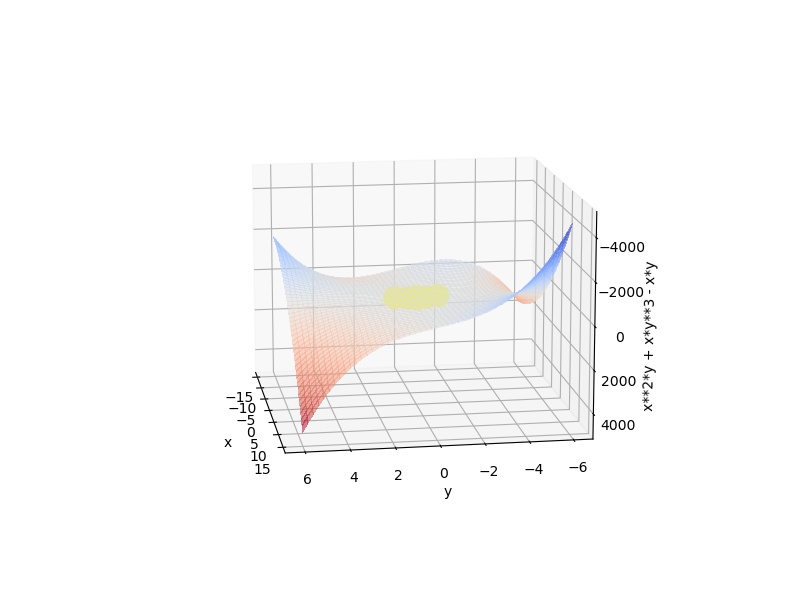

In [5]:
chastproizv(inputChastProizv())